<a href="https://colab.research.google.com/github/Junjaee/Study/blob/main/MachineLearning_DeepLearning/Study/07_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EC%99%80_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm
fm.FontProperties(fname = "맑은 고딕")
mpl.rcParams["axes.unicode_minus"] = False # 음수표시

import seaborn as sns
import tensorflow as tf


# 1. 단순 선형 회귀모델

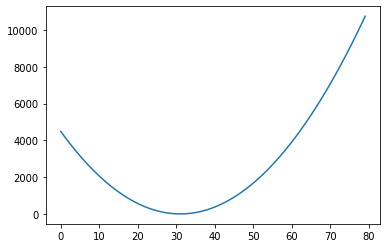

In [ ]:
##### 데이터 준비

x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.placeholder(tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train 

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

#----------------- 텐서플로의 그래프 완성 -----------------#

##### 비용함수를 가지고 그래프를 그려보기
sess = tf.Session()
cost_val = []

for i in range(-30, 50):
    result = sess.run(cost, feed_dict={W:i})
    cost_val.append(result)
                    
plt.plot(cost_val)
sess.close()

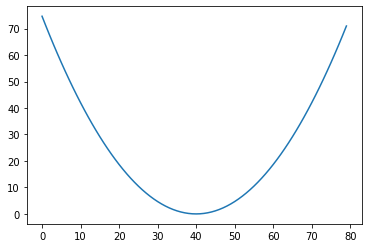

In [ ]:
sess = tf.Session()
cost_val = []

for i in range(-30, 50):
    result = sess.run(cost, feed_dict={W:i*0.1})
    cost_val.append(result)
                    
plt.plot(cost_val)
sess.close()

# 2. 경사 하강 알고리즘을 이용한 가중치 학습

In [ ]:
##### 데이터 준비

x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘
gradient = tf.reduce_mean((hypot-y_train) * x_train)
learning_rate = 0.1
descent = W - (learning_rate * gradient)
update = W.assign(descent)

########## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
    _, weight, c = sess.run([update, W, cost])
    print(step, weight, c)

sess.close()

0 [0.9230532] 2.4894989
1 [0.74721193] 0.82271004
2 [0.65343] 0.3486011
3 [0.6034129] 0.21374357
4 [0.57673717] 0.17538404
5 [0.5625101] 0.1644729
6 [0.5549223] 0.16136928
7 [0.5508755] 0.16048649
8 [0.5487172] 0.16023536
9 [0.5475661] 0.16016395
10 [0.5469522] 0.16014364
11 [0.5466248] 0.16013786
12 [0.54645014] 0.16013621
13 [0.546357] 0.16013573
14 [0.5463073] 0.16013558
15 [0.5462808] 0.16013557
16 [0.5462667] 0.16013557
17 [0.54625916] 0.16013555
18 [0.5462552] 0.16013555
19 [0.546253] 0.16013554


In [ ]:
##### 데이터 준비

x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘
gradient = tf.reduce_mean((hypot-y_train) * x_train)
learning_rate = 0.01
descent = W - (learning_rate * gradient)
update = W.assign(descent)

########## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
    _, weight, c = sess.run([update, W, cost], feed_dict={x_train:[1, 2, 3, 4, 5], y_train:[1, 2, 3, 4, 5]})
    print(step, weight, c)

sess.close()

0 [-0.85704315] 65.22581
1 [-0.6190684] 51.713066
2 [-0.40727085] 41.009613
3 [-0.21877103] 32.531418
4 [-0.0510062] 25.815832
5 [0.0983045] 20.496424
6 [0.23119102] 16.282915
7 [0.34946004] 12.9453945
8 [0.45471945] 10.301747
9 [0.54840034] 8.207713
10 [0.63177633] 6.549028
11 [0.70598096] 5.235185
12 [0.7720231] 4.1944895
13 [0.8308006] 3.3701541
14 [0.88311255] 2.7171974
15 [0.9296702] 2.1999917
16 [0.9711065] 1.7903122
17 [1.0079849] 1.4658053
18 [1.0408065] 1.2087631
19 [1.0700178] 1.0051606


In [ ]:
##### 데이터 준비

x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

########## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(5000):
    _, weight, c, bias = sess.run([update, W, cost, b], feed_dict={x_train:[1, 2, 3, 4, 5], y_train:[1, 2, 3, 4, 5]})
    print(step, weight, c, bias)

sess.close()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
0 [-0.1574964] 27.888128 [-0.2116654]
1 [0.10985273] 16.25259 [-0.13798232]
2 [0.31396407] 9.47197 [-0.08181384]
3 [0.4698008] 5.520555 [-0.03901541]
4 [0.5887855] 3.2178607 [-0.00642315]
5 [0.6796381] 1.8759598 [0.01837818]
6 [0.74901503] 1.093961 [0.03723233]
7 [0.8019978] 0.63824564 [0.05154678]
8 [0.84246546] 0.37267256 [0.06239598]
9 [0.8733793] 0.21790448 [0.07060013]
10 [0.89699984] 0.1277086 [0.07678537]
11 [0.9150528] 0.07514191 [0.08142968]
12 [0.92885536] 0.044503797 [0.08489791]
13 [0.9394133] 0.026644628 [0.08746863]
14 [0.94749427] 0.016232392 [0.08935446]
15 [0.9536843] 0.010159838 [0.09071772]
16 [0.95843065] 0.0066163787 [0.09168231]
17 [0.962075] 0.004546717 [0.09234282]
18 [0.9648779] 0.0033359402 [0.09277146]
19 [0.96703845] 0.0026257504 [0.09302336]
20 [0.9687086] 0.002207287 [0.09314059]
21 [0.97000426] 0.0019588373 [0.09315526]
22 [0.971014] 0.0018095209 [0.0930919]
23 [0.9718054] 0.001717997 [0.09296922]
24 [0.97243005] 0.0016

In [ ]:
##### 데이터 준비

x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

########## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(5000):
    _, weight, c, bias = sess.run([update, W, cost, b], feed_dict={x_train:[1, 2, 3, 4, 5], y_train:[2.1, 3.1, 4.1, 5.1, 6.1]})
    print(step, weight, c, bias)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
0 [0.6604987] 11.012606 [-0.39432532]
1 [0.8248485] 6.5448327 [-0.34406874]
2 [0.9500259] 3.9403777 [-0.30467826]
3 [1.045301] 2.4217772 [-0.27358624]
4 [1.1177499] 1.5359644 [-0.24883258]
5 [1.1727749] 1.018915 [-0.22892094]
6 [1.2144997] 0.7167684 [-0.21270901]
7 [1.2460723] 0.5398619 [-0.19932482]
8 [1.2698959] 0.43594518 [-0.18810266]
9 [1.287805] 0.3745684 [-0.17853436]
10 [1.3011999] 0.33798748 [-0.17023197]
11 [1.3111498] 0.31586194 [-0.16289933]
12 [1.3184708] 0.30216548 [-0.15631033]
13 [1.3237859] 0.29338676 [-0.15029238]
14 [1.3275706] 0.2874791 [-0.14471368]
15 [1.3301878] 0.28324983 [-0.13947365]
16 [1.3319149] 0.28000432 [-0.13449545]
17 [1.3329633] 0.27733696 [-0.12972043]
18 [1.3334947] 0.27501193 [-0.12510383]
19 [1.3336321] 0.27289143 [-0.12061144]
20 [1.3334697] 0.27089536 [-0.11621714]
21 [1.3330795] 0.2689772 [-0.11190098]
22 [1.3325161] 0.26710922 [-0.10764773]
23 [1.3318214] 0.26527563 [-0.10344574]
24 [1.3310275] 0.26346725 [-

In [ ]:
##### Testing

print(sess.run(hypot, feed_dict={x_train:[27]}))
print(sess.run(hypot, feed_dict={x_train:[2.5, 3.7]}))

sess.close()

[28.100138]
[3.5999942 4.800001 ]


# 3. 응용 예제
- 아래의 데이터를 가지고 하루 8시간을 일했을 때 매출액이 얼마인지 예측하시오

In [ ]:
X = [1, 2, 3, 4, 5, 6, 7]
y = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

In [ ]:
##### 데이터 준비

x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

########## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(5000):
    _, weight, c, bias = sess.run([update, W, cost, b], feed_dict={x_train:[1, 2, 3, 4, 5], y_train:[2.1, 3.1, 4.1, 5.1, 6.1]})
    print(step, weight, c, bias)



In [ ]:
##### 데이터 준비

x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

########## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(50000):
    _, weight, c, bias = sess.run([update, W, cost, b], feed_dict={x_train:[1, 2, 3, 4, 5, 6, 7], y_train:[25000, 55000, 75000, 110000, 128000, 155000, 180000]})
    print(step, weight, c, bias)



In [ ]:
print(sess.run(hypot, feed_dict={x_train:[8]}))
sess.close()

[206571.39]


# 4. 다중 선형 회귀 모델

In [ ]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

## (1) 단순하게 처리하는 경우

In [ ]:
X1 = tf.placeholder(tf.float32, shape=[None])
X2 = tf.placeholder(tf.float32, shape=[None])
X3 = tf.placeholder(tf.float32, shape=[None])

y = tf.placeholder(tf.float32, shape=[None])

##### 가설 설정 : y = W1X1 + W2X2 + W3X3 + b
W1 = tf.Variable(tf.random_normal([1]))
W2 = tf.Variable(tf.random_normal([1]))
W3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hypot = W1*X1 + W2*X2 + W3*X3 + b

##### 비용 함수
cost = tf.reduce_mean(tf.square((hypot - y)))

##### 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(5000):
    _, c, h = sess.run([train, cost, hypot], feed_dict={X1:x1_data, X2:x2_data, X3:x3_data, y:y_data})

    if step % 500 == 0:
        print(step, c, h) 

0 259090.53 [-296.6615  -360.50742 -353.0473  -386.21832 -274.48465]
500 3.9228046 [154.57695 182.60497 181.6959  196.15689 139.91759]
1000 3.0543532 [154.2257  182.84497 181.58727 196.0861  140.226  ]
1500 2.3914719 [153.91853 183.05478 181.49214 196.02504 140.49481]
2000 1.8854061 [153.64989 183.23817 181.40883 195.97241 140.72905]
2500 1.4989327 [153.41487 183.39851 181.33583 195.92717 140.93309]
3000 1.203685 [153.20927 183.53873 181.27187 195.88838 141.11081]
3500 0.97800124 [153.02931 183.66133 181.21574 195.8552  141.2655 ]
4000 0.80537975 [152.87178 183.7686  181.16652 195.8269  141.40015]
4500 0.67325485 [152.73381 183.86244 181.1233  195.80284 141.51723]


## (2) Matrix로 처리하는 경우

In [ ]:
X_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]

y_data = [[152.], [185.], [180.], [196.], [142.]]

In [ ]:
X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 1])

##### 가설 설정 : y = W1X1 + W2X2 + W3X3 + b
W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X, W) + b
 
##### 비용 함수
cost = tf.reduce_mean(tf.square((hypot - y)))

##### 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(5000):
    _, c, h = sess.run([train, cost, hypot], feed_dict={X:X_data, y:y_data})

    if step % 500 == 0:
        print(step, c, h) 

sess.close()

0 14454.117 [[37.44209 ]
 [60.970947]
 [51.31318 ]
 [62.922035]
 [44.563766]]
500 18.54463 [[144.64159]
 [188.6897 ]
 [177.74947]
 [200.45734]
 [141.82599]]
1000 16.536968 [[145.17099]
 [188.33478]
 [177.92183]
 [200.50345]
 [141.42651]]
1500 14.949513 [[145.63739]
 [188.02287]
 [178.07474]
 [200.5364 ]
 [141.08273]]
2000 13.683817 [[146.04877]
 [187.74857]
 [178.21063]
 [200.558  ]
 [140.78752]]
2500 12.664804 [[146.41208]
 [187.50719]
 [178.33173]
 [200.5698 ]
 [140.53473]]
3000 11.835217 [[146.73334]
 [187.29454]
 [178.43983]
 [200.57309]
 [140.31888]]
3500 11.15137 [[147.01784]
 [187.10703]
 [178.53654]
 [200.56906]
 [140.13524]]
4000 10.579863 [[147.27016]
 [186.94144]
 [178.62326]
 [200.55867]
 [139.97964]]
4500 10.095281 [[147.49435]
 [186.79506]
 [178.70128]
 [200.54288]
 [139.84851]]


## (3) 3차원 데이터를 2차원으로 코드 처리

In [ ]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

##### 데이터를 2차원으로 변환

X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 1])

##### 가설 설정
W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X, W) + b
 
##### 비용 함수
cost = tf.reduce_mean(tf.square((hypot - y)))

##### 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost)

#----------------------------------------------------------------------------------

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(9000):
    _, c, h = sess.run([train, cost, hypot], feed_dict={X:X_data, y:y_data})

    if step % 500 == 0:
        print(step, c, h) 

sess.close()

In [ ]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

X_data = np.dstack([x1_data, x2_data, x3_data])[0]
y_data = np.array(y_data).reshape(-1, 1)

X_data
y_data

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.]])

In [ ]:
# X_data = list([x1_data, x2_data, x3_data])
# X_data

X_data = []
for i in zip(x1_data, x2_data, x3_data):
    X_data.append(list(i))
    
X_data

y_data = np.reshape(y_data, (-1, 1))

In [ ]:
x_data = pd.DataFrame(zip(x1_data, x2_data, x3_data)).values
x_data

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]])

In [ ]:
datas = np.reshape([x1_data, x2_data, x3_data], (3, 5)).T
datas

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]])

In [ ]:
sess = tf.Session()
tf.stack([x1_data, x2_data, x3_data],axis=1).eval(session=sess)

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]], dtype=float32)

# 5. 빅데이터 처리

## (1) DASK
- 가상의 데이터 프레임
- 병렬처리용 작업 스케줄러

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive


/content/drive/My Drive


In [ ]:
%%writefile sample1.csv

c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three
4, 4.44, four
5, 5.55, five
6, 6.66, six

Overwriting sample1.csv


In [ ]:
df1 = pd.read_csv("sample1.csv")
df1

df1[" c2"].mean()

3.8850000000000002

In [ ]:
pip install dask[dataframe] --upgrade

     |████████████████████████████████| 983kB 9.5MB/s 
     |████████████████████████████████| 122kB 45.7MB/s 
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [ ]:
import dask.dataframe as dd

In [ ]:
df2 = dd.read_csv("sample1.csv")
df2

,c1,c2,c3
npartitions=1,,,
,int64,float64,object
,...,...,...


In [ ]:
df2.head()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s


,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three
3,4,4.44,four
4,5,5.55,five


In [ ]:
df2[" c2"].mean().compute()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s


3.8850000000000002

In [ ]:
df3 = dd.read_csv("sample1.csv", dtype=str, error_bad_lines=False, warn_bad_lines=False)
df3

,c1,c2,c3
npartitions=1,,,
,object,object,object
,...,...,...


In [ ]:
df4 = pd.read_csv("crime.csv")
df4

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11806700,JC407332,08/25/2019 11:59:00 PM,062XX S RHODES AVE,041A,BATTERY,AGGRAVATED: HANDGUN,ALLEY,False,False,313,3,20.0,42,04B,1180972.0,1863843.0,2019.0,09/01/2019 04:06:45 PM,41.781634,-87.612055,"(41.781633612, -87.612055328)",53.0,22260.0,9.0,331.0,4.0,60.0,18.0,275.0
1,11806688,JC407352,08/25/2019 11:55:00 PM,005XX N STATE ST,0460,BATTERY,SIMPLE,CTA TRAIN,False,False,1834,18,42.0,8,08B,1176278.0,1903807.0,2019.0,09/01/2019 04:06:45 PM,41.891405,-87.628062,"(41.891404732, -87.628061509)",22.0,21182.0,37.0,669.0,36.0,55.0,14.0,73.0
2,11806642,JC407330,08/25/2019 11:53:00 PM,021XX S MARSHALL BLVD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,APARTMENT,False,False,1022,10,24.0,30,04B,1157038.0,1889488.0,2019.0,09/01/2019 04:06:45 PM,41.852524,-87.699109,"(41.852524171, -87.699109455)",29.0,21569.0,32.0,203.0,1.0,57.0,21.0,151.0
3,11806708,JC407343,08/25/2019 11:51:00 PM,081XX S ELIZABETH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,613,6,21.0,71,15,1169406.0,1850843.0,2019.0,09/01/2019 04:06:45 PM,41.746218,-87.654835,"(41.746218342, -87.654834868)",18.0,21554.0,70.0,575.0,13.0,59.0,20.0,233.0
4,11806592,JC407328,08/25/2019 11:50:00 PM,024XX N AUSTIN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,2515,25,30.0,19,08B,1135987.0,1915683.0,2019.0,09/01/2019 04:06:45 PM,41.924807,-87.775749,"(41.924807368, -87.775749308)",52.0,22615.0,19.0,78.0,21.0,2.0,6.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114441,11634935,JC200055,03/25/2019 09:00:00 PM,048XX N KILPATRICK AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1712,17,39.0,14,06,1144390.0,1932038.0,2019.0,04/01/2019 04:21:13 PM,41.969533,-87.744460,"(41.969532846, -87.744459671)",28.0,21869.0,14.0,751.0,38.0,48.0,1.0,48.0
114442,11635470,JC200758,03/25/2019 09:00:00 PM,030XX S TROY ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1033,10,12.0,30,08B,1155847.0,1884206.0,2019.0,04/01/2019 04:21:13 PM,41.838054,-87.703623,"(41.838053804, -87.703622952)",29.0,21569.0,32.0,124.0,1.0,57.0,21.0,160.0
114443,11634876,JC199959,03/25/2019 09:00:00 PM,007XX W ADAMS ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1232,12,27.0,28,14,1171256.0,1899328.0,2019.0,04/01/2019 04:21:13 PM,41.879226,-87.646636,"(41.879225851, -87.646636417)",41.0,4452.0,29.0,786.0,46.0,45.0,15.0,95.0
114444,11635992,JC201300,03/25/2019 09:00:00 PM,106XX S INDIANA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,512,5,9.0,49,08B,1179465.0,1834482.0,2019.0,04/01/2019 04:21:13 PM,41.701098,-87.618474,"(41.701098117, -87.618474497)",30.0,21861.0,45.0,236.0,43.0,19.0,10.0,256.0


In [ ]:
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [ ]:
%%time
df4.count().compute()

In [ ]:
%%time
df4.count().compute(scheduler="processes", num_workers=8)

In [ ]:
##### 새로운 컬럼 추가

# df2["title"] = df2["c1"].astype(str) + "%"
df2["title"] = 200

NotImplementedError: ignored

In [ ]:
##### 특정 컬럼 수정

# print((df2["c1"] + 3).compute())
# print(df2.head())

tmp = df2["c1"] + 3
df2 = tmp

df2.head()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s


0    4
1    5
2    6
3    7
4    8
Name: c1, dtype: int64

In [ ]:
##### 복수 개의 데이터 처리

In [ ]:
%%writefile sample2.csv
# c1, c2, c3
7, 7.77, seven
8, 8.88, eight
9, 9.99, nine

Overwriting sample2.csv


In [ ]:
df4 = dd.read_csv("sample2.csv")

In [ ]:
df4.count().compute()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s


c1     3
 c2    3
 c3    3
dtype: int64

## (2) QueueRunner

### 1) 간단한 예제 1
- enqueue_many와 dequeue

In [ ]:
##### queue의 길이와 저장될 데이터 형식

q = tf.FIFOQueue(20, "float")

# enc_ops = q.enqueue_many(([1.0, 2.0, 3.0, 4.0],))
# qr = tf.train.QueueRunner(q, [enc_ops]*3)

enc_ops1 = q.enqueue_many(([1.0, 2.0, 3.0],))
enc_ops2 = q.enqueue_many(([4.0, 5.0, 6.0],))
enc_ops3 = q.enqueue_many(([7.0, 8.0, 9.0],))
qr = tf.train.QueueRunner(q, [enc_ops1, enc_ops2, enc_ops3])

sess = tf.Session()
coordi = tf.train.Coordinator()
threads = qr.create_threads(sess, coord=coordi, start=True)

for step in range(20):
    print(sess.run(q.dequeue()))

coordi.request_stop()
coordi.join(threads)
sess.close()

1.0
2.0
3.0
4.0
5.0
6.0
4.0
5.0
6.0
4.0
5.0
6.0
4.0
5.0
6.0
4.0
5.0
6.0
4.0
5.0


### 2) 파일로부터 데이터 불러오기

In [ ]:
# sample1, sample2 파일 불러올 때 변수명 삭제하기(c1, c2, c3)
filename_queue = tf.train.string_input_producer(["sample1.csv", "sample2.csv"], shuffle=False, name="filename_queue")

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

recorded_defaults = [[0], [0.0], ["null"]]
a1, a2, a3 = tf.decode_csv(value, record_defaults=recorded_defaults, field_delim=",")

In [ ]:
df = pd.read_csv("sample1.csv")
df
df = pd.read_csv("sample2.csv")
df

,# c1,c2,c3
0,7,7.77,seven
1,8,8.88,eight
2,9,9.99,nine


In [ ]:
sess = tf.Session()
coordi = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coordi)

for i in range(30):
    print(sess.run([a1, a2, a3]))

coordi.request_stop()
coordi.join(threads)
sess.close()

InvalidArgumentError: ignored

### 3) 슬라이드 소스 보기

In [ ]:
filename_queue = tf.train.string_input_producer(
   ['data-01-test-score.csv'], 
   shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)


In [ ]:
"""
BATCH
-------
- Full Batch 또는 Batch : 전체 데이터
    - 샘플 전체를 계산하므로 시간이 많이 걸린다
    - 데이터가 많을 경우(한번에 데이터를 메모리에 load하지 못하는 경우) 사용이 불가
    - 오차율이 적다

- Stochastic Gradient Descent: 한 개의 데이터
    - 데이터를 한개씩 추출해서 처리해보고 이를 모든 데이터에 반복
    - 오차율이 클 수 있다
    - 하드웨어 성능을 제대로 발휘할 수 없다(특히 GPU)

- Mini Batch
    - 전체 훈련데이터를 배치 사이즈로 등분하여 각 배치 셋을 순차적으로 수행
    - Full Batch보다 빠르고 SGD보다 오차율도 낮다
"""

In [ ]:
tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).


[<tf.Tensor 'batch:0' shape=(10, 3) dtype=float32>,
 <tf.Tensor 'batch:1' shape=(10, 1) dtype=float32>]

In [ ]:
X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypot-y))

train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

coordi = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coordi)

for step in range(2000):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    #_, c, h = sess.run([train, cost, hypot], feed_dict={X:x_batch, y:y_batch})
    sess.run([train, cost, hypot], feed_dict={X:x_batch, y:y_batch})
    
    #if step%500 == 0:
    #    print(step, c, h)
        
coordi.request_stop()
coordi.join(threads)

sess.run(hypot, feed_dict={X:[[100, 70, 101]]})

sess.close()

# 6. 로지스틱 회귀 모델

In [3]:
X_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [4]:
X = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

# 가설
hypot = tf.sigmoid(tf.matmul(X, W) + b)

# 비용
cost = -tf.reduce_mean(y * tf.log(hypot) + (1 - y) * tf.log(1 - hypot))

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10000):
    _, h= sess.run([train, hypot], feed_dict={X:X_data, y:y_data})
    
    if step % 100 == 0:
        print(step, h)

0 [[0.08827051]
 [0.01916354]
 [0.03588853]
 [0.00354169]
 [0.00151366]
 [0.0013647 ]]
100 [[0.47042894]
 [0.47413898]
 [0.6721336 ]
 [0.61393964]
 [0.67866045]
 [0.7858646 ]]
200 [[0.4216999 ]
 [0.42975134]
 [0.6976048 ]
 [0.62407964]
 [0.71131593]
 [0.8400523 ]]
300 [[0.3771057 ]
 [0.38617054]
 [0.7077376 ]
 [0.6192468 ]
 [0.72337157]
 [0.8667618 ]]
400 [[0.3416386 ]
 [0.35283998]
 [0.71435624]
 [0.61651766]
 [0.7340911 ]
 [0.88568765]]
500 [[0.31303975]
 [0.32706112]
 [0.718347  ]
 [0.6152892 ]
 [0.74367434]
 [0.8995129 ]]
600 [[0.28959376]
 [0.30681428]
 [0.7202811 ]
 [0.61505765]
 [0.7522151 ]
 [0.9098526 ]]
700 [[0.27006543]
 [0.29068485]
 [0.7205882 ]
 [0.61551183]
 [0.75984716]
 [0.9177539 ]]
800 [[0.25356027]
 [0.27767318]
 [0.719594  ]
 [0.616455  ]
 [0.766707  ]
 [0.92390954]]
900 [[0.23942193]
 [0.2670603 ]
 [0.7175478 ]
 [0.6177574 ]
 [0.7729168 ]
 [0.9287882 ]]
1000 [[0.22716184]
 [0.25832018]
 [0.7146431 ]
 [0.61933064]
 [0.7785818 ]
 [0.93271476]]
1100 [[0.21641135]
 [0

In [6]:
preds = tf.cast(hypot > 0.5, dtype=tf.float32)
sess.run(preds, feed_dict={X:X_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y), dtype=tf.float32))

h, p, a = sess.run([hypot, preds, accuracy], feed_dict={X:X_data, y:y_data})
print(h)
print(p)
print(a)

[[0.03124284]
 [0.15952222]
 [0.30726373]
 [0.78029007]
 [0.9388847 ]
 [0.9799375 ]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
1.0


## 1) Softmax

In [7]:
X_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], 
                                                        [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

In [8]:
X = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 3])

W = tf.Variable(tf.random_normal([4, 3]))
b = tf.Variable(tf.random_normal([3]))

# 가설
hypot = tf.nn.softmax(tf.matmul(X, W) + b)

# 비용
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hypot), axis=1))

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, c = sess.run([train, cost], feed_dict={X:X_data, y:y_data})
    
    if step%100 == 0:
        print(step, c)

0 13.913886
100 1.0674472
200 0.8131659
300 0.7483733
400 0.7111161
500 0.68251646
600 0.6586486
700 0.6380591
800 0.61997426
900 0.60389256
1000 0.589455
1100 0.57639015
1200 0.5644858
1300 0.5535727
1400 0.5435129
1500 0.53419304
1600 0.5255189
1700 0.517411
1800 0.5098026
1900 0.50263613
2000 0.4958631
2100 0.48944098
2200 0.4833335
2300 0.477509
2400 0.47194004
2500 0.46660244
2600 0.46147525
2700 0.4565397
2800 0.45177954
2900 0.44718048


In [10]:
preds = tf.argmax(hypot, 1)
sess.run(preds, feed_dict={X:X_data, y:y_data})

array([2, 2, 2, 1, 0, 1, 0, 0])

In [11]:
correct = tf.equal(preds, tf.argmax(y, 1))
sess.run(correct, feed_dict={X:X_data, y:y_data})

array([ True,  True,  True,  True, False,  True,  True,  True])

In [12]:
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:X_data, y:y_data})

0.875

In [13]:
##### 테스트 : [1, 11, 7, 9]

result = sess.run(hypot, feed_dict={X:[[1, 11, 7, 9]]})
print(result)

print(sess.run(tf.argmax(result, 1)))

[[9.5383859e-01 4.6026871e-02 1.3457154e-04]]
[0]


## (2) softmax_cross_entropy_with_logits()

In [15]:
X = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 3])

W = tf.Variable(tf.random_normal([4, 3]))
b = tf.Variable(tf.random_normal([3]))

# 가설과 비용
logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y_data)

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# 그래프 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, c = sess.run([train, cost], feed_dict={X:X_data, y:y_data})
        
# 테스트
result = sess.run(hypot, feed_dict={X:[[1, 11, 7, 9]]})
print(result)

print(sess.run(tf.argmax(result, 1)))

[[1.273370e-02 9.872590e-01 7.275332e-06]]
[1]


## (3) 사례1 : 동물 분류

In [16]:
xy = np.loadtxt("./data-04-zoo.csv", dtype=np.float32, delimiter=",")
print(xy.shape)

X_data = xy[:, 0 : -1]
y_data = xy[:, [-1]]

print(X_data.shape, y_data.shape)

(101, 17)
(101, 16) (101, 1)


In [17]:
X = tf.placeholder(tf.float32, shape=[None, 16])
y = tf.placeholder(tf.int32, shape=[None, 1])

W = tf.Variable(tf.random_normal([16, 7]))
b = tf.Variable(tf.random_normal([7]))

##### Label을 Onehot encoding으로 처리
y_one_hot = tf.one_hot(y, 7)
#sess = tf.Session()
#print(sess.run(y_one_hot, feed_dict={y:y_data}))
y_one_hot = tf.reshape(y_one_hot, [-1, 7])

##### 가설과 비용
logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y_one_hot)

##### 최소 비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(200):
    _, c = sess.run([train, tf.reduce_mean(cost)], feed_dict={X:X_data, y:y_data})
    
    if step%10 == 0:
        print(step, c)

0 6.779306
10 0.5685833
20 0.39171088
30 0.2987281
40 0.24019392
50 0.20008934
60 0.17083246
70 0.1485766
80 0.13114548
90 0.11718571
100 0.10579981
110 0.09636642
120 0.088442974
130 0.08170647
140 0.075917095
150 0.070893414
160 0.06649637
170 0.06261772
180 0.059172355
190 0.05609238


In [19]:
preds = tf.argmax(hypot, 1)
correct = tf.equal(preds, tf.argmax(y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

sess.run(accuracy, feed_dict={X:X_data, y:y_data})

1.0

## (4) 사례2 : MNIST 이미지 데이터셋

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official

In [5]:
print(type(mnist))
dir(mnist)

mnist.train.labels
print(mnist.train.num_examples)
print(mnist.test.num_examples)

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
55000
10000


In [6]:
X = tf.placeholder(tf.float32, shape=[None, 28*28])
y = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.random_normal([28*28, 10]))
b = tf.Variable(tf.random_normal([10]))

##### 가설과 비용
logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y)

##### 최소 비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

correct = tf.equal(tf.argmax(hypot, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [34]:
##### full batch

for step in range(200):
    _, c, a = sess.run([train, tf.reduce_mean(cost), accuracy],
                       feed_dict={X:mnist.train.images, y:mnist.train.labels})
    
    if step%20 == 0:
        print(c, '\t', a)

12.630076 	 0.07325455
3.2231476 	 0.48545456
2.086777 	 0.6218
1.6521289 	 0.6859273
1.417305 	 0.72278184
1.2668148 	 0.74734545
1.1605707 	 0.7649818
1.0807505 	 0.7790727
1.0180902 	 0.79087275
0.96724397 	 0.79945457


In [9]:
##### mini batch

for step in range(5):
    total_batch = int(mnist.train.num_examples/100)

    for step in range(total_batch):
        _, c, a = sess.run([train, tf.reduce_mean(cost), accuracy],
                       feed_dict={X:mnist.train.images, y:mnist.train.labels})
    
        if step%20 == 0:
            print(c, '\t', a)

11.048466 	 0.088454545
3.3247004 	 0.47481817
2.1246452 	 0.62085456
1.6696187 	 0.684
1.4247167 	 0.7221818
1.2689278 	 0.7474
1.1596774 	 0.7666364
1.0779772 	 0.7804
1.0140356 	 0.7909818
0.9622897 	 0.8002545
0.9193287 	 0.80825454
0.8829244 	 0.8144909
0.8515533 	 0.8202182
0.8241401 	 0.8254909
0.79990494 	 0.8295636
0.77826816 	 0.83312726
0.75878876 	 0.8363818
0.7411248 	 0.83965456
0.7250064 	 0.84238183
0.7102176 	 0.84525454
0.69658303 	 0.84752727
0.6839587 	 0.8496909
0.6722251 	 0.8516
0.66128176 	 0.8538909
0.65104324 	 0.8554
0.6414368 	 0.85696363
0.63239944 	 0.8583091
0.62387663 	 0.86005455
0.6197933 	 0.8606727
0.6119559 	 0.86201817
0.604526 	 0.86343634
0.5974695 	 0.8645273
0.5907564 	 0.8658364
0.5843598 	 0.8668909
0.57825583 	 0.8679636
0.57242286 	 0.8689455
0.5668416 	 0.86947274
0.56149447 	 0.8705091
0.55636543 	 0.8713818
0.55144006 	 0.8725273
0.5467051 	 0.87292725
0.54214853 	 0.87396365
0.5377592 	 0.87485456
0.533527 	 0.8756
0.52944267 	 0.876181

In [8]:
##### mini batch

training_epochs = 5
batch_size = 100

for epoch in range(5):
    total_batch = int(mnist.train.num_examples/100)
    avg_cost = 0

    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        _, c, a = sess.run([train, tf.reduce_mean(cost), accuracy],
                       feed_dict={X:batch_x, y:batch_y})
    
        avg_cost += c / total_batch
        
    print(avg_cost, '\t', a)    

3.6635987939617816 	 0.8
2.2227290254831282 	 0.9
2.10904427203265 	 0.74
1.9795498182556817 	 0.88
1.9165001339262209 	 0.86


In [16]:
import random

r = random.randint(0, mnist.test.num_examples-1)
r

3554

In [17]:
print("Label :", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))

Label : [6]


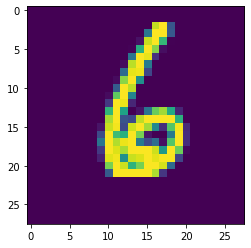

In [28]:
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28))

In [23]:
print("Prediction :", sess.run(tf.argmax(hypot, 1), feed_dict={X:mnist.test.images[r:r+1]}))

Prediction : [6]
